<a href="https://colab.research.google.com/github/Gayathri16401/Sem_7_DataMining_Lab/blob/main/NN_EX_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20-09-2021 - LAB EXCERCISE 4 NEURAL NETWORK**

**1. LOAD DATASET**

In [4]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
data = pd.read_csv("/content/pizza_v1.csv")
data.head(10)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
5,A,"Rp140,000",18.5,black papper,american_favorite,jumbo,no,no
6,A,"Rp110,000",16.0,smoked beef,american_favorite,jumbo,no,yes
7,A,"Rp70,000",8.0,papperoni,american_favorite,reguler,no,no
8,A,"Rp90,000",12.0,mushrooms,american_favorite,reguler,yes,no
9,A,"Rp90,000",12.0,smoked beef,american_favorite,reguler,no,no


In [7]:
data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [9]:
# shape of data
data.shape

(129, 8)

In [10]:
data.isnull().any()

company         False
price_rupiah    False
diameter        False
topping         False
variant         False
size            False
extra_sauce     False
extra_cheese    False
dtype: bool

In [11]:
# replace the of yes or no into 1,0

data = data.replace(["yes","no"],[1,0])
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,1,1
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,1,1
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,1,1
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,1,0
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,1,0


In [12]:
##checing varities in company
data['company'].value_counts()

E    30
C    30
A    25
B    24
D    20
Name: company, dtype: int64

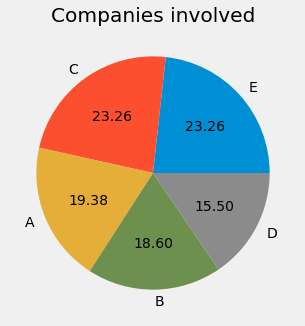

In [13]:
# plot varities in company

plt.figure(figsize=(5,5))
data['company'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Companies involved')
plt.ylabel('')
plt.show()

In [14]:
# replace the of A, B, C, E or no into 0,1,2,3,4

data = data.replace(['A','B','C','D','E'],[0,1,2,3,4])
data['company']

0      0
1      0
2      0
3      0
4      0
      ..
124    4
125    4
126    4
127    4
128    4
Name: company, Length: 129, dtype: int64

In [15]:
data['price_rupiah'].dtype
price = []
for item in data['price_rupiah']:
    price.append(int(item.replace('Rp','').replace(',','')))
data['price_rupiah'] = price
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235000,22.0,chicken,double_signature,jumbo,1,1
1,0,198000,20.0,papperoni,double_signature,jumbo,1,1
2,0,120000,16.0,mushrooms,double_signature,reguler,1,1
3,0,155000,14.0,smoked beef,double_signature,reguler,1,0
4,0,248000,18.0,mozzarella,double_signature,jumbo,1,0


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['topping']=labelencoder.fit_transform(data['topping'])
data['variant']=labelencoder.fit_transform(data['variant'])
data['size']=labelencoder.fit_transform(data['size'])
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235000,22.0,2,8,1,1,1
1,0,198000,20.0,7,8,1,1,1
2,0,120000,16.0,5,8,4,1,1
3,0,155000,14.0,9,8,4,1,0
4,0,248000,18.0,4,8,1,1,0


In [17]:
data.corr()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
company,1.000000,-0.300033,-0.182710,0.002093,-0.109497,0.021434,-0.038954,0.034503
price_rupiah,-0.300033,1.000000,0.826977,-0.077875,0.130395,-0.551606,0.083859,0.011817
diameter,-0.182710,0.826977,1.000000,-0.178475,0.193343,-0.836722,-0.063957,0.055488
topping,0.002093,-0.077875,-0.178475,1.000000,0.255129,0.145894,0.042505,-0.012019
variant,-0.109497,0.130395,0.193343,0.255129,1.000000,-0.255651,-0.029388,0.268582
size,0.021434,-0.551606,-0.836722,0.145894,-0.255651,1.000000,0.226068,-0.119754
extra_sauce,-0.038954,0.083859,-0.063957,0.042505,-0.029388,0.226068,1.000000,-0.089131
extra_cheese,0.034503,0.011817,0.055488,-0.012019,0.268582,-0.119754,-0.089131,1.000000


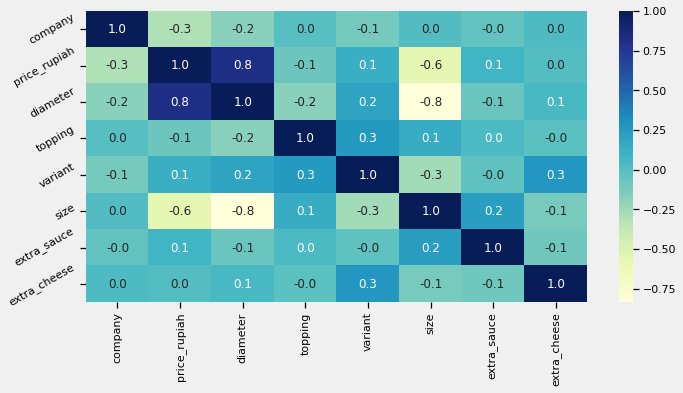

In [18]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))
a = sns.heatmap(corr, annot=True, fmt='.1f', cmap='YlGnBu')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

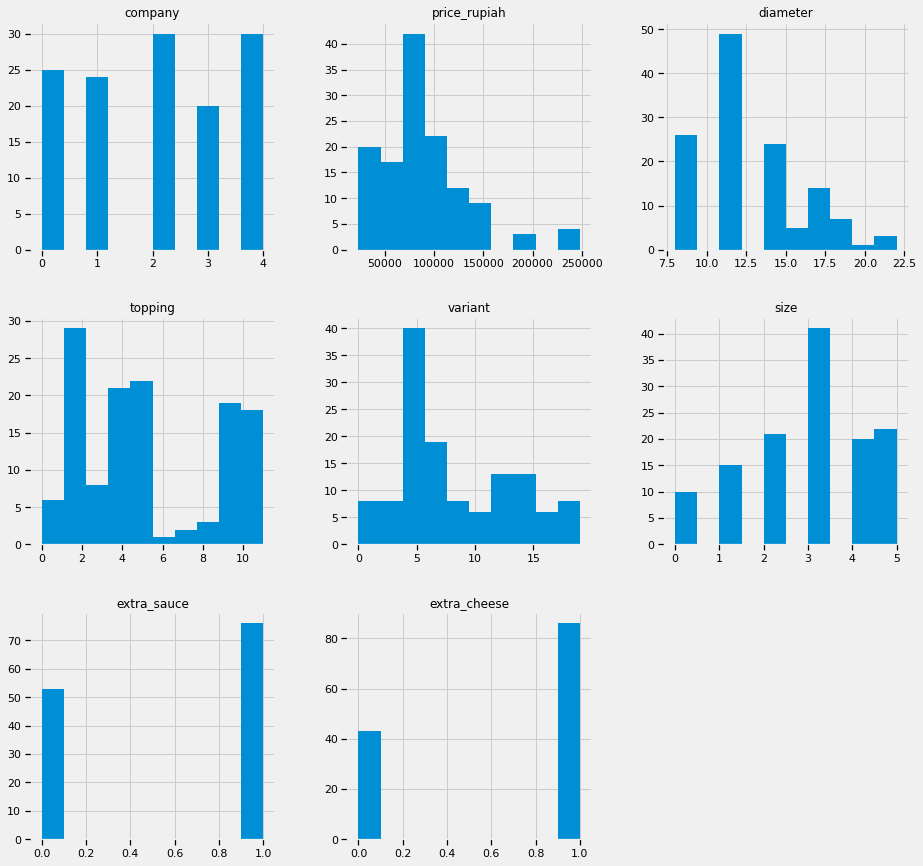

In [19]:
data.hist(figsize=(14,14))
plt.show()

In [20]:
x = (data.loc[:, data.columns !='price_rupiah'])
y = (data.loc[:, data.columns =='price_rupiah'])

In [21]:
from tensorflow.keras.utils import to_categorical
one_hot_labels = to_categorical(y)

In [22]:
x.describe()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667
std,1.435381,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000
50%,2.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000
75%,3.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000
max,4.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000


In [23]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,one_hot_labels,test_size=.20,random_state=1)

In [24]:
x_train

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
80,3,16.0,9,13,1,0,1
44,1,12.0,5,4,3,1,1
99,4,17.0,4,15,0,0,1
54,2,14.0,3,0,2,1,0
83,3,12.0,4,13,4,1,1
...,...,...,...,...,...,...,...
9,0,12.0,9,3,4,0,0
72,2,14.0,11,19,2,0,0
12,0,8.0,9,18,4,1,1
107,4,12.0,2,4,3,0,1


In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
x_test

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
122,4,17.0,2,15,0,0,1
104,4,17.0,2,15,0,0,1
55,2,8.5,8,1,5,0,1
56,2,12.0,8,1,3,1,1
33,1,14.0,5,4,2,0,1
119,4,12.0,5,4,3,1,1
123,4,12.0,5,6,3,0,1
35,1,17.0,4,15,0,0,1
31,1,8.5,5,4,5,1,1
51,2,14.0,10,17,2,1,1


In [28]:
mean = x_train.mean(axis=0)
x_train-= mean
std = x_train.std(axis=0)
x_train/= std
x_test-= mean
x_test/= std

In [29]:
from keras import models
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow
network = models.Sequential()
network.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
network.add(Dense(8, activation='relu'))
network.add(Dense(1))

In [30]:
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [31]:
history=network.fit(x_train, y_train, epochs=15, verbose=1)

Epoch 1/15
4/4 [==============================] - 1s 51ms/step - loss: 0.2548 - mae: 0.4328
Epoch 2/15
4/4 [==============================] - 0s 46ms/step - loss: 0.1587 - mae: 0.3267
Epoch 3/15
4/4 [==============================] - 0s 45ms/step - loss: 0.1221 - mae: 0.2776
Epoch 4/15
4/4 [==============================] - 0s 45ms/step - loss: 0.0942 - mae: 0.2379
Epoch 5/15
4/4 [==============================] - 0s 46ms/step - loss: 0.0749 - mae: 0.2087
Epoch 6/15
4/4 [==============================] - 0s 46ms/step - loss: 0.0579 - mae: 0.1805
Epoch 7/15
4/4 [==============================] - 0s 45ms/step - loss: 0.0479 - mae: 0.1639
Epoch 8/15
4/4 [==============================] - 0s 45ms/step - loss: 0.0380 - mae: 0.1445
Epoch 9/15
4/4 [==============================] - 0s 45ms/step - loss: 0.0309 - mae: 0.1297
Epoch 10/15
4/4 [==============================] - 0s 44ms/step - loss: 0.0247 - mae: 0.1154
Epoch 11/15
4/4 [==============================] - 0s 48ms/step - loss: 0.0197 

In [32]:
network.evaluate(x_test,y_test)

1/1 [==============================] - 0s 151ms/step - loss: 0.0146 - mae: 0.0878


[0.014596009626984596, 0.08777083456516266]

In [33]:
result_1=network.predict(x_test)
result_1

array([[ 0.0434528 ],
       [ 0.0434528 ],
       [-0.04304628],
       [-0.02477905],
       [ 0.01415342],
       [-0.02048566],
       [-0.0426066 ],
       [ 0.01793365],
       [ 0.12833396],
       [ 0.04753062],
       [-0.3365745 ],
       [-0.26924512],
       [ 0.11344433],
       [-0.08768237],
       [ 0.07224801],
       [ 0.04734506],
       [ 0.10535964],
       [ 0.00884335],
       [-0.20069507],
       [-0.15198323],
       [ 0.1973391 ],
       [ 0.12651762],
       [-0.01823391],
       [-0.00192824],
       [ 0.08146515],
       [ 0.03726603]], dtype=float32)

In [34]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'mae'])

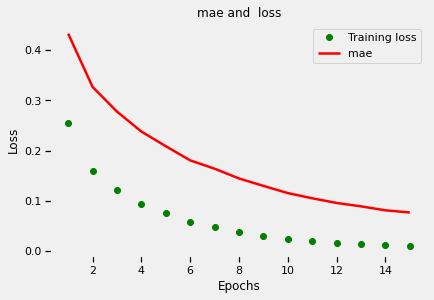

In [35]:
loss = history_dict['loss']
mae = history_dict['mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, mae, 'r', label='mae')
plt.title('mae and  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.grid()
plt.show()